In [ ]:
!pip install mne

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss
import scipy.io
import scipy.stats as st
import os
import pandas as pd
import mne


0.23.4


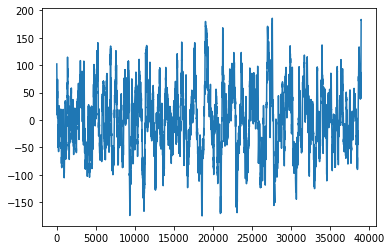

In [ ]:
print(mne.__version__)

file = "P1_high1.mat"

data = scipy.io.loadmat(file)

plt.plot(data["y"].T[0])

Creating RawArray with float64 data, n_channels=9, n_times=39032
    Range : 0 ... 39031 =      0.000 ...   152.465 secs
Ready.
<Info | 8 non-empty values
 bads: []
 ch_names: Fz, C3, Cz, C4, CP1, CPz, CP2, Pz, trig
 chs: 8 EEG, 1 STIM
 custom_ref_applied: False
 dig: 11 items (3 Cardinal, 8 EEG)
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 9
 projs: []
 sfreq: 256.0 Hz
>


/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


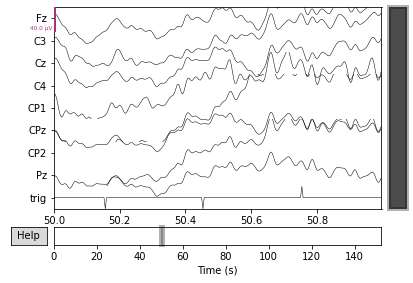

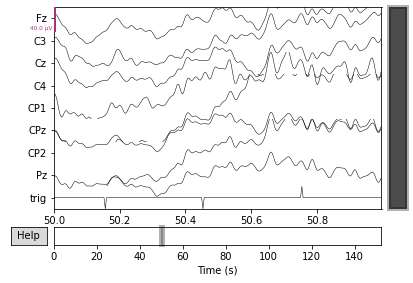

In [ ]:
ch_names = ['Fz', 'C3', 'Cz', 'C4', 'CP1', 'CPz', 'CP2', 'Pz', 'trig']
ch_types = ["eeg"] * (len(ch_names)-1) + ['stim']
sampling_freq = float(data["fs"])
Fs = sampling_freq

info = mne.create_info(ch_names, ch_types=ch_types, sfreq=sampling_freq)
info.set_montage('standard_1020')

data_n = np.vstack([np.array(np.matrix(data["y"]).T)*1e-6, data["trig"].T + 2])

raw = mne.io.RawArray(data_n, info)

print(info)
raw.plot(duration=1, start = 50)

#plt.plot(raw["Fz"][0][0])

Trigger channel has a non-zero initial value of 2 (consider using initial_event=True to detect this event)
480 events found
Event IDs: [2 3 4]
Not setting metadata
Not setting metadata
480 matching events found
Setting baseline interval to [-0.1015625, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 480 events and 181 original time points ...
    Rejecting  epoch based on EEG : ['Fz', 'C3', 'Cz', 'C4', 'CP1', 'CPz', 'CP2']
    Rejecting  epoch based on EEG : ['C3', 'C4']
    Rejecting  epoch based on EEG : ['C3', 'C4', 'CP1', 'CPz', 'Pz']
    Rejecting  epoch based on EEG : ['C3', 'C4', 'CP1', 'Pz']
    Rejecting  epoch based on EEG : ['C3', 'C4', 'CP1']
    Rejecting  epoch based on EEG : ['C3', 'Cz', 'C4', 'CP1', 'CPz', 'CP2', 'Pz']
    Rejecting  epoch based on EEG : ['Fz', 'C3', 'Cz', 'C4', 'CP1', 'CPz', 'CP2', 'Pz']
    Rejecting  epoch based on EEG : ['C4']
    Rejecting  epoch based on EEG : ['C4', 'CP2']
    Rejecting  epoch base

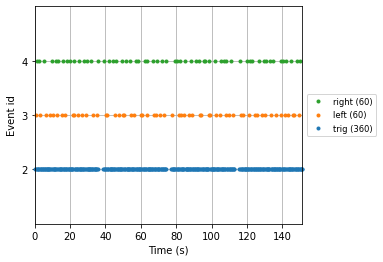

combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


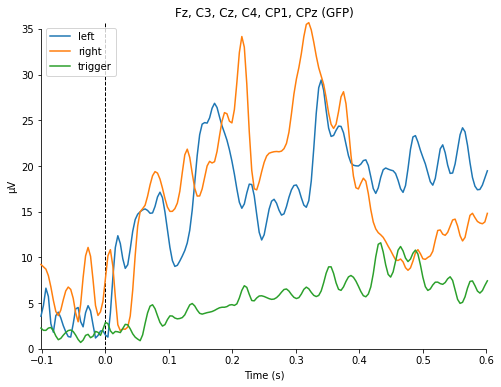

[<Figure size 576x432 with 1 Axes>]

In [ ]:
events = mne.find_events(raw, stim_channel='trig')

event_dict = dict(trig=2, left=3, right=4)

reject_criteria = dict(eeg = 100e-6)
epochs = mne.Epochs(raw, events, event_id=event_dict, tmin=-0.1, tmax=0.6, reject=reject_criteria, preload=True)

fig = mne.viz.plot_events(events, sfreq=raw.info['sfreq'], first_samp=raw.first_samp, event_id=event_dict)

picks = mne.pick_types(raw.info, eeg=True)

aver_left = epochs["left"].average()
aver_right = epochs["right"].average()
aver_trig = epochs["trig"].average()
mne.viz.plot_compare_evokeds(dict(left = aver_left, right = aver_right, trigger = aver_trig), picks=picks)

No projector specified for this dataset. Please consider the method self.add_proj.


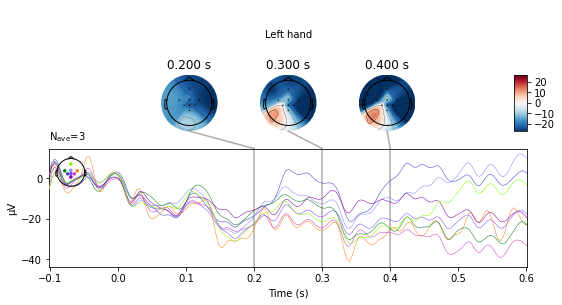

No projector specified for this dataset. Please consider the method self.add_proj.


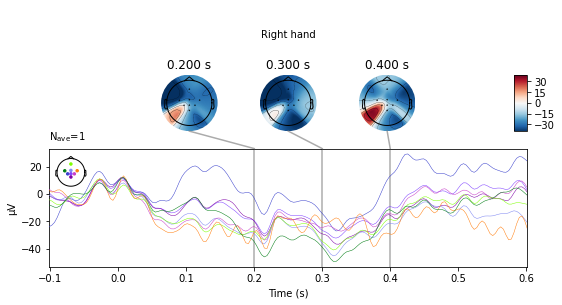

No projector specified for this dataset. Please consider the method self.add_proj.


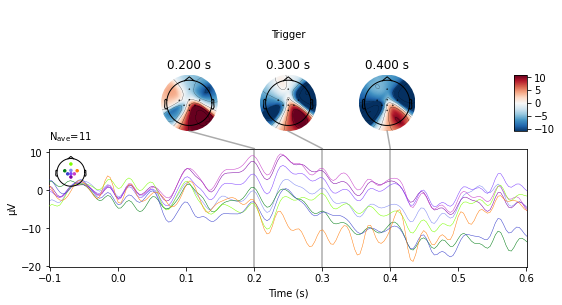

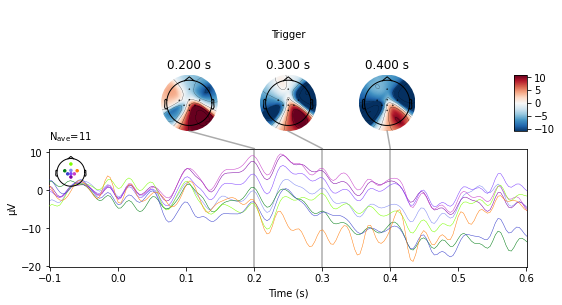

In [ ]:
aver_left.plot_joint(title='Left hand', picks=picks, times = [0.2, 0.3, 0.4])
aver_right.plot_joint(title='Right hand', picks=picks, times = [0.2, 0.3, 0.4])
aver_trig.plot_joint(title='Trigger', picks=picks, times = [0.2, 0.3, 0.4])